In [99]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

In [100]:
df=pd.read_csv('/content/Titanic_train.csv')#loading dataset

In [101]:
df.head()#checking first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.info()#checking null values,datatype,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.isna().sum()#checking null values of all the columns

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


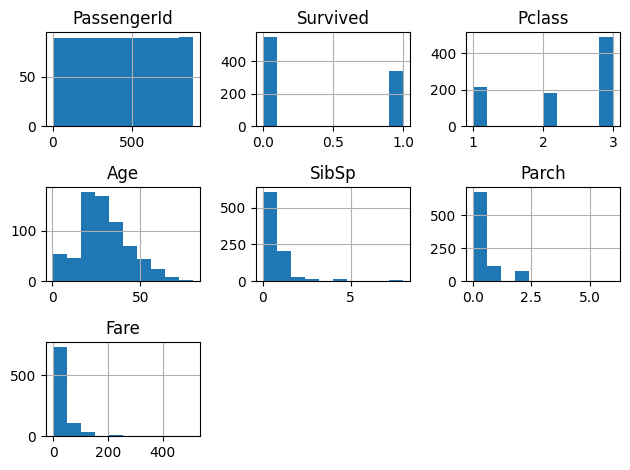

In [104]:
df.hist()#histogram of dataset
plt.tight_layout()

<Axes: >

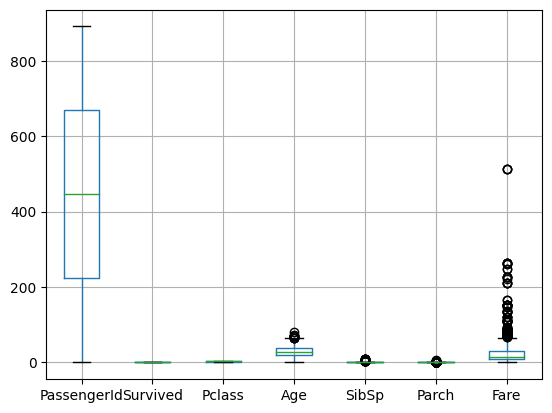

In [105]:
df.boxplot()#boxplot of dataset

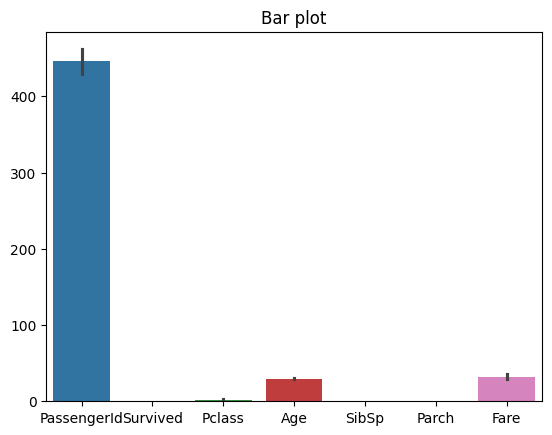

In [106]:
sns.barplot(df)#barplot of dataset
plt.title("Bar plot")
plt.show()

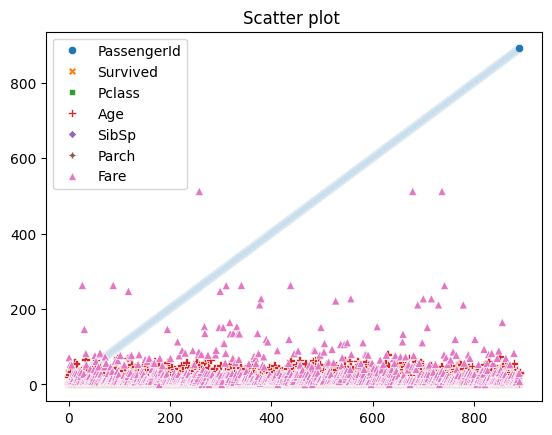

In [107]:
sns.scatterplot(data=df)#scatterplot of dataset
plt.title('Scatter plot ')
plt.show()

# **Data Preprocessing**

In [108]:
#replacing null values and deleting the columns(which have lot of null values)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [109]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [110]:
df.head()#checking data after dropping cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['Age', 'SibSp' ,'Parch','Fare']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

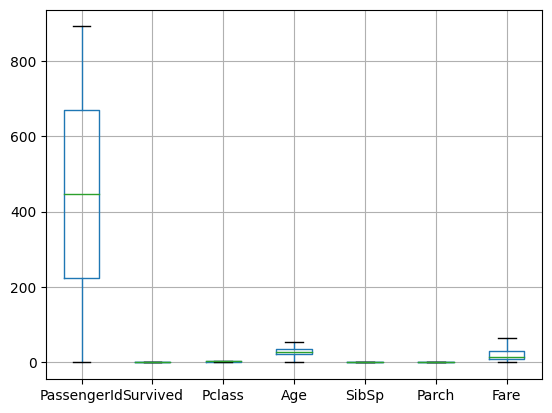

In [112]:
df.boxplot()#checking for outliers

In [113]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Listing categorical columns to encode using LabelEncoder
categorical_cols = ['Name','Sex','Ticket','Embarked']  # Choosing categorical columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# **Building Predictive Models**

In [114]:
#Splitting the data into X,y
from sklearn.model_selection import train_test_split
X=df.drop(columns='Survived')
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [115]:
#Model bulding
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
#lightGBM
lgb_model=lgb.LGBMClassifier(min_split_gain=0.0,max_depth=2,random_state=1,verbose=-1)
lgb_model.fit(X_train,y_train)
lgb_acc,lgb_prec,lgb_rec,lgb_f1=evaluate_model(lgb_model,X_test,y_test)
#XGBM
xgb_model=xgb.XGBClassifier(max_depth=3,random_state=42,eval_metrics='logloss')
xgb_model.fit(X_train,y_train)
xgb_acc,xgb_prec,xgb_rec,xgb_f1=evaluate_model(xgb_model,X_test,y_test)

In [116]:
print('lightGBM:',{lgb_acc,lgb_prec,lgb_rec,lgb_f1})
print('XGBM:',{xgb_acc,xgb_prec,xgb_rec,xgb_f1})

lightGBM: {0.7821229050279329, 0.84, 0.5753424657534246, 0.6829268292682927}
XGBM: {0.7821229050279329, 0.7931034482758621, 0.7022900763358778, 0.6301369863013698}


In [117]:
from sklearn.model_selection import GridSearchCV

# LightGBM Hyperparameter tuning
lgb_params = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'num_leaves': [31, 50]}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=1), lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
lgb_best = lgb_grid.best_estimator_
lgb_best_acc, lgb_best_prec, lgb_best_rec, lgb_best_f1 = evaluate_model(lgb_best, X_test, y_test)

In [118]:
lgb_grid.best_params_#parameters which are tuned

{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}

In [119]:
# XGBoost Hyperparameter tuning
xgb_params = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'max_depth': [3, 6]}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_best_acc, xgb_best_prec, xgb_best_rec, xgb_best_f1 = evaluate_model(xgb_best, X_test, y_test)

In [120]:
xgb_grid.best_params_#parameters which are tuned

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [121]:
# Printing tuned results
print(f"Tuned LightGBM - Accuracy: {lgb_best_acc}, Precision: {lgb_best_prec}, Recall: {lgb_best_rec}, F1-Score: {lgb_best_f1}")
print(f"Tuned XGBoost - Accuracy: {xgb_best_acc}, Precision: {xgb_best_prec}, Recall: {xgb_best_rec}, F1-Score: {xgb_best_f1}")

Tuned LightGBM - Accuracy: 0.7821229050279329, Precision: 0.7931034482758621, Recall: 0.6301369863013698, F1-Score: 0.7022900763358778
Tuned XGBoost - Accuracy: 0.7653631284916201, Precision: 0.7818181818181819, Recall: 0.589041095890411, F1-Score: 0.671875


In [122]:
#re-building the model with best tuning parameters
Tunedlgb_model=lgb.LGBMClassifier(learning_rate=0.1,n_estimators=200,num_leaves=31,min_split_gain=0.0,max_depth=2,random_state=1,verbose=-1)
Tunedlgb_model.fit(X_train,y_train)
lgb_best_acc,lgb_best_prec,lgb_best_rec,lgb_best_f1=evaluate_model(Tunedlgb_model,X_test,y_test)

Tunedxgb_model=xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,random_state=42,eval_metrics='logloss')
Tunedxgb_model.fit(X_train,y_train)
xgb_best_acc,xgb_best_prec,xgb_best_rec,xgb_best_f1=evaluate_model(Tunedxgb_model,X_test,y_test)

In [123]:
#Evaluation metrics of tuned algorithms
print(f"Tuned LightGBM - Accuracy: {lgb_best_acc}, Precision: {lgb_best_prec}, Recall: {lgb_best_rec}, F1-Score: {lgb_best_f1}")
print(f"Tuned XGBoost - Accuracy: {xgb_best_acc}, Precision: {xgb_best_prec}, Recall: {xgb_best_rec}, F1-Score: {xgb_best_f1}")

Tuned LightGBM - Accuracy: 0.7653631284916201, Precision: 0.803921568627451, Recall: 0.5616438356164384, F1-Score: 0.6612903225806451
Tuned XGBoost - Accuracy: 0.7653631284916201, Precision: 0.7818181818181819, Recall: 0.589041095890411, F1-Score: 0.671875


# **Comparative Analysis**

In [124]:
results = pd.DataFrame({#converting evaluation metrics as dataframe for better understanding
    'Model': ['LightGBM', 'XGBoost', 'Tuned LightGBM', 'Tuned XGBoost'],
    'Accuracy': [lgb_acc, xgb_acc, lgb_best_acc, xgb_best_acc],
    'Precision': [lgb_prec, xgb_prec, lgb_best_prec, xgb_best_prec],
    'Recall': [lgb_rec, xgb_rec, lgb_best_rec, xgb_best_rec],
    'F1-Score': [lgb_f1, xgb_f1, lgb_best_f1, xgb_best_f1]
})

In [125]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,LightGBM,0.782123,0.840000,0.575342,0.682927
1,XGBoost,0.782123,0.793103,0.630137,0.702290
2,Tuned LightGBM,0.765363,0.803922,0.561644,0.661290
3,Tuned XGBoost,0.765363,0.781818,0.589041,0.671875


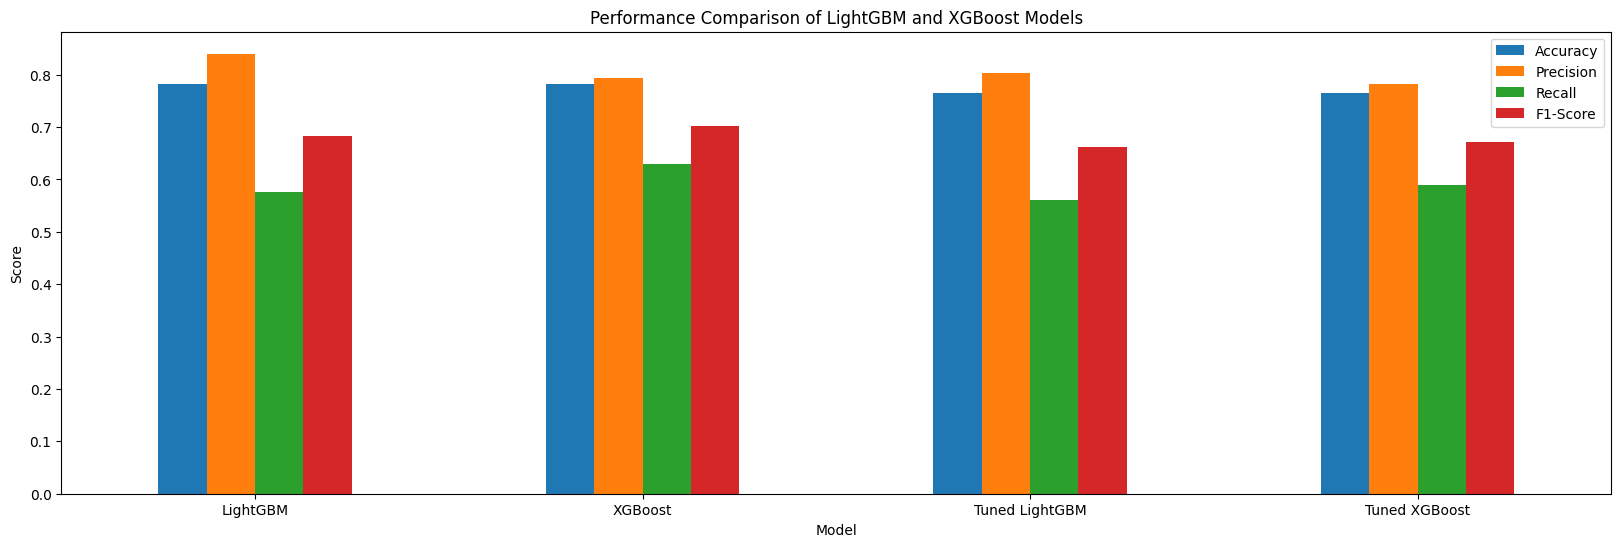

In [126]:
results.set_index('Model').plot(kind='bar', figsize=(20, 6))#visulization of results
plt.title('Performance Comparison of LightGBM and XGBoost Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

**LightGBM:**

# Strenght:

LightGBM is optimized for speed and can handle large datasets more efficiently.

LightGBM tends to perform better on large datasets with a high number of features and instances.

LightGBM requires less memory compared to XGBoost due to its efficient data structure.


# Weakness:


The models created by LightGBM can be more complex, leading to lower interpretability compared to simpler models.

LightGBM can be sensitive to hyperparameter choices, requiring careful tuning to achieve optimal performance.


**XGBOOST:**

# Strength:
XGBoost offers L1 and L2 regularization to prevent overfitting, which is particularly useful for datasets with many features.

It has mechanisms to prevent overfitting through cross-validation and early stopping.

XGBoost supports a wide range of loss functions and evaluation criteria, making it suitable for various types of predictive modeling tasks.

# Weakness:

XGBoost may be slower to train, especially with very large datasets due to its more complex handling of the data.

XGBoost can consume more memory, particularly with large datasets.
